# Análise da exportação de mandeira manejada da Amazônia do estado do Pará

In [75]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('ibama-dof-2017-pa.xlsx')

In [47]:
paises = list(df['País de Destino'].value_counts().index)
paises[4] = "Reino Unido"
paises[8] = "Antilhas Neerlandesas"

## Buscando coordenadas dos países

In [48]:
latitudeList = []
longitudeList = []

for neigh in paises:
    try:
        address = f'{neigh}'
        geolocator = Nominatim(user_agent='worl_explorer')
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        latitudeList.append(latitude)
        longitudeList.append(longitude)     
    except:
        latitudeList.append(None)
        longitudeList.append(None)

In [49]:
dfPaises = pd.DataFrame()
dfPaises['country'] = paises
dfPaises['latitude'] = latitudeList
dfPaises['longitude'] = longitudeList

In [52]:
print(dfPaises['latitude'].isna().sum())
dfPaises.drop(dfPaises[dfPaises['latitude'].isnull()].index, axis=0, inplace=True)
print(dfPaises['latitude'].isna().sum())
dfPaises.reset_index(inplace=True)
del dfPaises['index']
dfPaises.head(2)

0
0


,country,latitude,longitude
0,Estados Unidos da América,39.783730,-100.445882
1,França,46.603354,1.888334


## Plotando mapa

In [63]:
woodMap = folium.Map(location=[0, 0], zoom_start=0.55, tiles='Stamen Terrain')

for lat, long, label in zip(dfPaises.latitude, dfPaises.longitude, dfPaises.country):
    folium.CircleMarker([lat, long], radius=1, popup=label, color='red',
                        fill=True, fill_opacity=1).add_to(woodMap)

woodMap

## Plotando gráfico com valor total de exportado

In [72]:
dfExportacao = df.groupby(['País de Destino']).sum()

Text(0, 0.5, 'País')

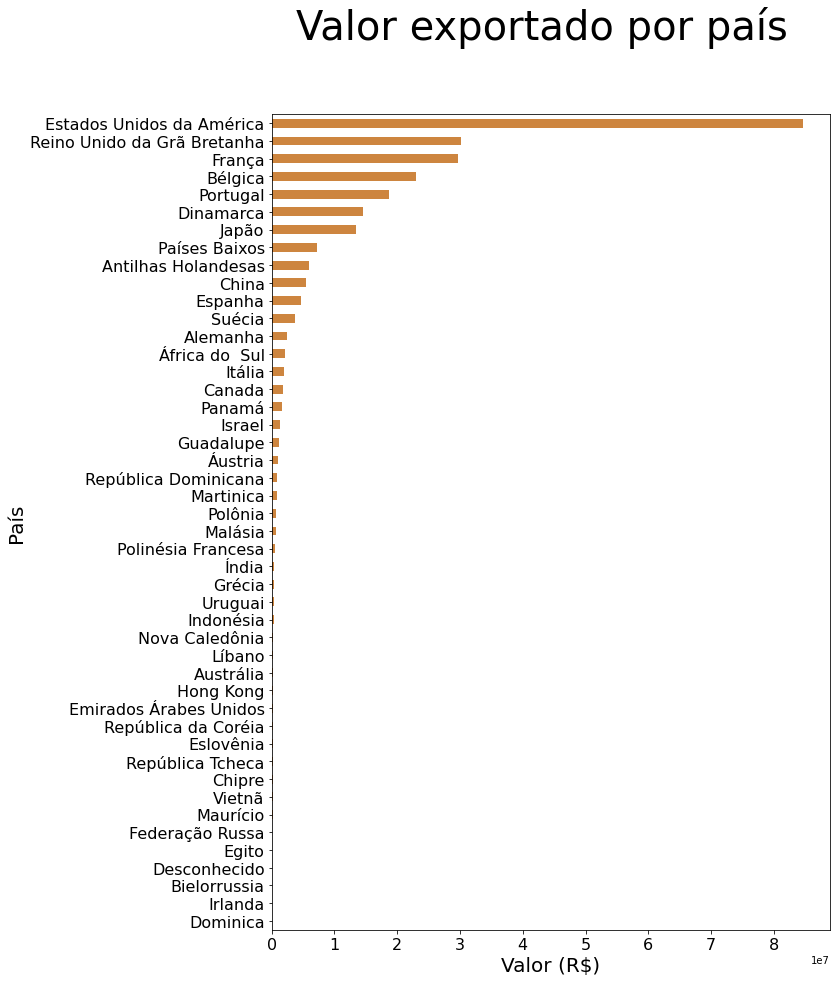

In [133]:
fig = plt.figure()
fig.suptitle('Valor exportado por país', fontsize=40)

dfPlot = dfExportacao['Valor total (R$)'].to_frame()
dfPlot = dfPlot.sort_values(by=['Valor total (R$)'])

ax0 = fig.add_subplot(1,1,1)

dfPlot.plot(kind='barh', figsize=(10, 15),ax=ax0, legend=None, color='peru')
ax0.set_xlabel('Valor (R$)', fontsize=20)
ax0.tick_params(axis='both', labelsize=16)
ax0.set_ylabel('País', fontsize=20)